In [11]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [12]:
# Paths to your dataset directories
train_dir = 'dataset/Training'
validation_dir = 'dataset/Validation'

In [26]:
# Image parameters
img_height, img_width = 128, 128  # Resize all images to 128x128
batch_size = 32

In [27]:
# Define the ImageDataGenerator for loading and preprocessing data
train_datagen = ImageDataGenerator(
    rescale=1./255  # Normalize pixel values (0-255 to 0-1)
)

val_datagen = ImageDataGenerator(
    rescale=1./255  # Normalize pixel values
)

In [28]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),  # Resize all images
    batch_size=batch_size,
    class_mode='binary',  # Binary classification: male vs female
    color_mode='rgb',     # Color images (RGB)
    shuffle=True          # Shuffle the dataset for better training
)

# Load validation data
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False  # Don't shuffle validation data
)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [29]:
# Define the CNN model
model = Sequential()

# First convolutional layer with max pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))  # 3 for RGB channels
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer with max pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer with max pooling
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to feed into fully connected layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer for binary classification (male vs female)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary output

In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer is good for most cases
    loss='binary_crossentropy',  # Binary classification
    metrics=['accuracy']  # Track accuracy during training
)

In [32]:
# Train the model
epochs = 10  
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size, 
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/10
1469/1469 ━━━━━━━━━━━━━━━━━━━━ 275s 187ms/step - accuracy: 0.8153 - loss: 0.3860 - val_accuracy: 0.9448 - val_loss: 0.1456
Epoch 2/10
1469/1469 ━━━━━━━━━━━━━━━━━━━━ 0s 18us/step - accuracy: 0.9688 - loss: 0.0716 - val_accuracy: 1.0000 - val_loss: 5.7871e-05
Epoch 3/10


2024-09-11 13:00:50.707007: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 282s 192ms/step - accuracy: 0.9382 - loss: 0.1666 - val_accuracy: 0.9565 - val_loss: 0.1118
Epoch 4/10
1469/1469 ━━━━━━━━━━━━━━━━━━━━ 0s 9us/step - accuracy: 0.9062 - loss: 0.2947 - val_accuracy: 1.0000 - val_loss: 1.3743e-06
Epoch 5/10
1469/1469 ━━━━━━━━━━━━━━━━━━━━ 290s 198ms/step - accuracy: 0.9509 - loss: 0.1358 - val_accuracy: 0.9578 - val_loss: 0.1142
Epoch 6/10
1469/1469 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step - accuracy: 0.9062 - loss: 0.2131 - val_accuracy: 1.0000 - val_loss: 1.1803e-05
Epoch 7/10


2024-09-11 13:10:23.471145: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 290s 197ms/step - accuracy: 0.9564 - loss: 0.1245 - val_accuracy: 0.9587 - val_loss: 0.1081
Epoch 8/10
1469/1469 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step - accuracy: 1.0000 - loss: 0.0460 - val_accuracy: 1.0000 - val_loss: 7.6787e-06
Epoch 9/10
1469/1469 ━━━━━━━━━━━━━━━━━━━━ 297s 202ms/step - accuracy: 0.9606 - loss: 0.1099 - val_accuracy: 0.9603 - val_loss: 0.1046
Epoch 10/10
1469/1469 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step - accuracy: 0.8750 - loss: 0.2390 - val_accuracy: 1.0000 - val_loss: 2.6722e-05


In [33]:
import matplotlib.pyplot as plt

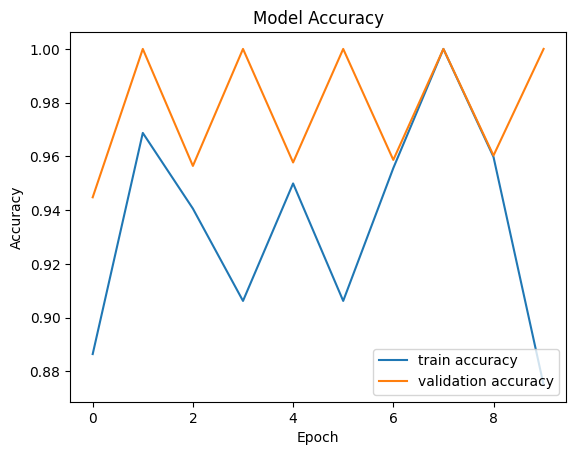

In [34]:

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

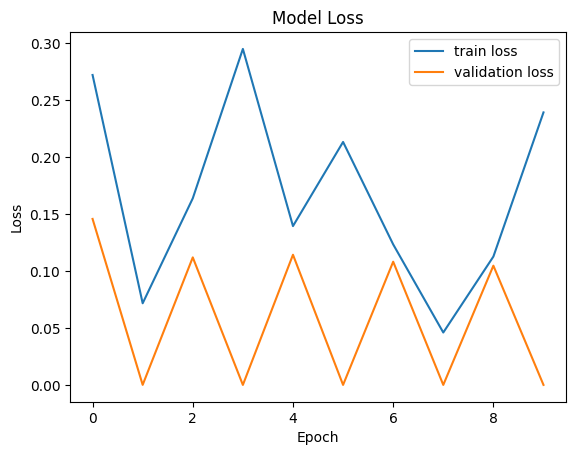

In [35]:
# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [36]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_acc}')

365/365 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.9641 - loss: 0.0959
Validation Loss: 0.10487174987792969
Validation Accuracy: 0.9606833457946777


In [37]:
model.save('classification.keras')